In [69]:
import svgwrite

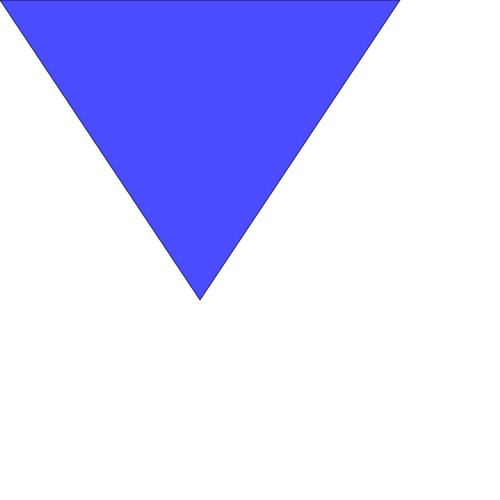

In [70]:
dessin  = svgwrite.Drawing('assets/exercice_1.svg', size=(500,500))

triangle=[
    (0,0),
    (400,0),
    (200,300)
  ]

dessin.add(dessin.polygon(triangle, fill='#0000FF',\
                          stroke="#000000", opacity=0.7 ))

dessin.save()
display(dessin)

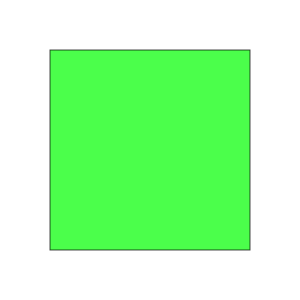

In [152]:
import svgwrite

dessin = svgwrite.Drawing('assets/exercice_2.svg', size=(300,300))

centre_x, centre_y = 150, 150
size = 200

carre = [
    (centre_x - size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y + size / 2),
    (centre_x - size / 2, centre_y + size / 2)
]

dessin.add(dessin.polygon(carre, fill='#00FF00', stroke="#000000", opacity=0.7))

dessin.save()
display(dessin)

In [72]:
def translater(input, vectTrans):
  x,y=input
  tx,ty=vectTrans
  return (x+tx,y+ty)

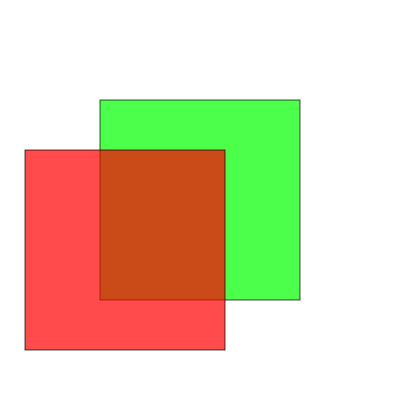

In [73]:
dessin = svgwrite.Drawing('assets/exercice_carre_trans.svg', size=(400,400))

centre_x, centre_y = 200, 200
size = 200

carre = [
    (centre_x - size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y + size / 2),
    (centre_x - size / 2, centre_y + size / 2)
]

trans=(-75,50)

carre_trans=[translater(sommet,trans) for sommet in carre]

dessin.add(dessin.polygon(carre, fill='#00FF00',stroke="#000000", opacity=0.7))
dessin.add(dessin.polygon(carre_trans, fill='#FF0000',stroke="#000000", opacity=0.7))

dessin.save()
display(dessin)

In [74]:
import math

def rotation10(angle):
  return (math.cos(angle), math.sin(angle))

def rotation01(angle):
  return (-math.sin(angle), math.cos(angle))

In [130]:
def rotation(point, angle):
  x, y = point
  v1x, v1y = rotation10(angle)
  v2x, v2y = rotation01(angle)

  return (x*v1x + y*v2x, x*v1y + y*v2y)

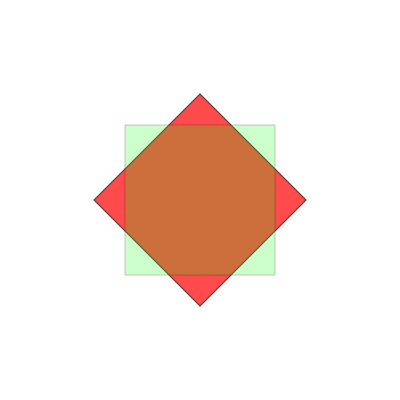

In [160]:
dessin = svgwrite.Drawing('assets/exercice_carre_rotation.svg', size=(400,400))

centre_x, centre_y = 0, 0
size = 150

carre = [
    (centre_x - size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y + size / 2),
    (centre_x - size / 2, centre_y + size / 2)
]

angle=math.pi/4

trans = (200, 200)

carre_rotation = [rotation(sommet,angle) for sommet in carre]

new_carre = [translater(sommet, trans) for sommet in carre]
new_carre_rotation = [translater(sommet, trans) for sommet in carre_rotation]

dessin.add(dessin.polygon(new_carre_rotation, fill='#FF0000',stroke="#000000", opacity=0.7))
dessin.add(dessin.polygon(new_carre, fill='#00FF00',stroke="#000000", opacity=0.2))

dessin.save()
display(dessin)

In [108]:
def prodMatVect(Mat, Vect):
  x, y = Vect
  ( (a11,a12), (a21, a22) ) = Mat

  x2 = a11 * x + a12 * y
  y2 = a21 * x + a22 * y

  return (x2,y2)


def Matrotation(angle):
  return ( (math.cos(angle), -math.sin(angle)), (math.sin(angle), math.cos(angle)) )

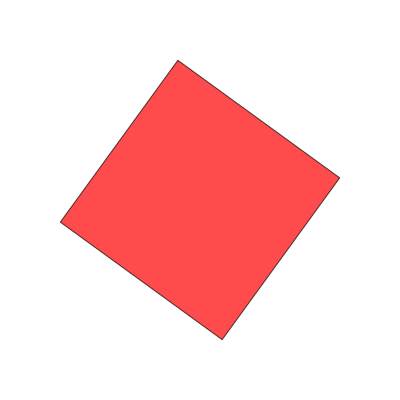

In [164]:
dessin = svgwrite.Drawing('assets/exercice_prod_mat_vect.svg', size=(400,400))

centre_x, centre_y = 0, 0
size = 200

carre = [
    (centre_x - size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y + size / 2),
    (centre_x - size / 2, centre_y + size / 2)
]

angle=math.pi/5

trans = (200, 200)

matRot=Matrotation(angle)

carre_out=[prodMatVect(matRot,sommet) for sommet in carre]
new_carre_out = [translater(sommet, trans) for sommet in carre_out]

dessin.add(dessin.polygon(new_carre_out, fill='#FF0000', stroke="#000000", opacity=0.7))

dessin.save()
display(dessin)

In [79]:
def Matdilatation(coefDilatation):
  return ((coefDilatation,0),(0, coefDilatation))

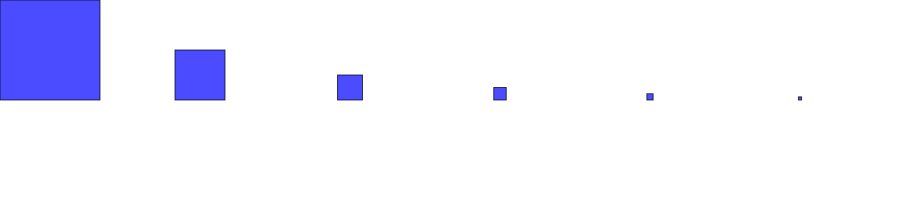

In [173]:
dessin = svgwrite.Drawing('assets/question3.svg', size=(900,200))

centre_x, centre_y = 0, 0
size = 100

carre = [
    (centre_x - size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y + size / 2),
    (centre_x - size / 2, centre_y + size / 2)
]

nb = 6
coefDilatation=0.5

trans = (50, 50)

for i in range(nb):
    matDil = Matdilatation(coefDilatation ** i)
    x_translation = (size + size/2) * i
    y_translation = size/2 - (size/2 * (coefDilatation ** i))
    carre_out = [translater(prodMatVect(matDil, sommet), (x_translation, y_translation)) for sommet in carre]
    new_carre_out = [translater(sommet, trans) for sommet in carre_out]
    dessin.add(dessin.polygon(new_carre_out, fill='#0000FF', stroke="#000000", opacity=0.7))


dessin.save()
display(dessin)

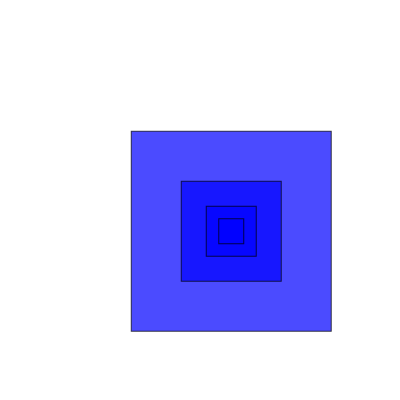

In [229]:
dessin = svgwrite.Drawing('assets/question4.svg', size=(400,400))

centre_x, centre_y = 0, 0
size = 200

carre = [
    (centre_x - size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y + size / 2),
    (centre_x - size / 2, centre_y + size / 2)
]

trans = (100, 100)
nb = 4
coefDilatation=0.5

for i in range(nb):
    matDil = Matdilatation(coefDilatation ** i)
    carre_out = [translater(prodMatVect(matDil, sommet), (x_translation, y_translation)) for sommet in carre]
    new_carre_out = [translater(sommet, trans) for sommet in carre_out]
    dessin.add(dessin.polygon(new_carre_out, fill='#0000FF', stroke="#000000", opacity=0.7))


dessin.save()
display(dessin)

In [230]:
def prodMatMat(MatA, MatB):
  ((a11, a12), (a21, a22)) = MatA
  ((b11, b12), (b21, b22)) = MatB

  return (
    (a11 * b11 + a12 * b21, a11 * b12 + a12 * b22),
    (a21 * b11 + a22 * b21, a21 * b12 + a22 * b22)
  )

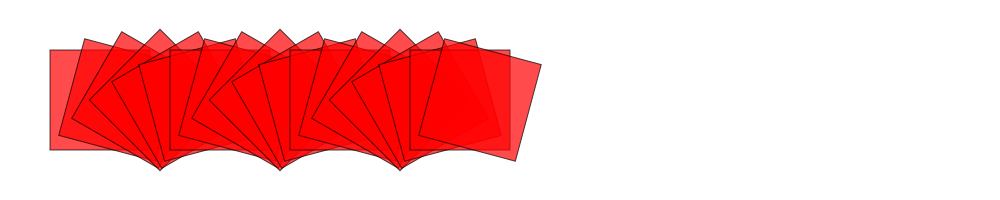

In [270]:
dessin = svgwrite.Drawing('assets/question5.svg', size=(1000,200))

centre_x, centre_y = 0, 0
size = 100

carre = [
    (centre_x - size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y - size / 2),
    (centre_x + size / 2, centre_y + size / 2),
    (centre_x - size / 2, centre_y + size / 2)
]

nb = 20
rotation = math.pi/12
decalage = 20

for i in range(nb):
    matRot = Matrotation(rotation * i)
    carre_out = [prodMatVect(matRot, sommet) for sommet in carre]
    new_carre_out = [translater(sommet, (100 + (decalage * i), 100)) for sommet in carre_out]
    dessin.add(dessin.polygon(new_carre_out, fill='#FF0000', stroke="#000000", opacity=0.7))

dessin.save()
display(dessin)

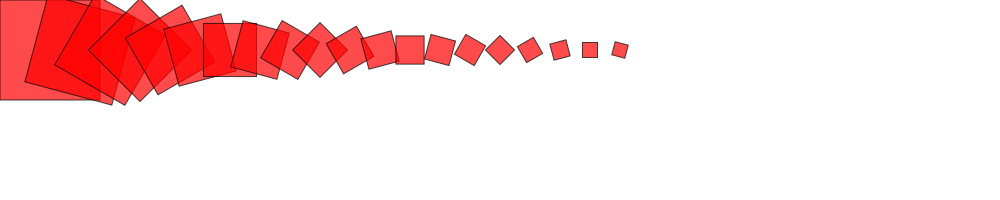

In [84]:
dessin = svgwrite.Drawing('assets/question6.svg', size=(1000,200))

x, y = (0,0)
size = 100

carre=[
    (x,y),
    (size,x),
    (size,size),
    (y,size)
  ]

nb = 20
rotation = math.pi/12
decalage = 30

centre_x = size / 2
centre_y = size / 2

for i in range(nb):
    # ! Rotation indépendante
    matRot = Matrotation(rotation * i)
    # ! Dilatation indépendante
    matDil = Matdilatation(0.9 ** i)
    # ! Produit des matrices
    matFinal = prodMatMat(matRot, matDil)
    # ! Translations
    x_translation = centre_x + (i * decalage)
    y_translation = centre_y
    carre_out = [
        translater(prodMatVect(matFinal, translater(sommet, (-centre_x, -centre_y))), (x_translation, y_translation)) for sommet in carre] 
    dessin.add(dessin.polygon(carre_out, fill='#FF0000', stroke="#000000", opacity=0.7))

dessin.save()
display(dessin)

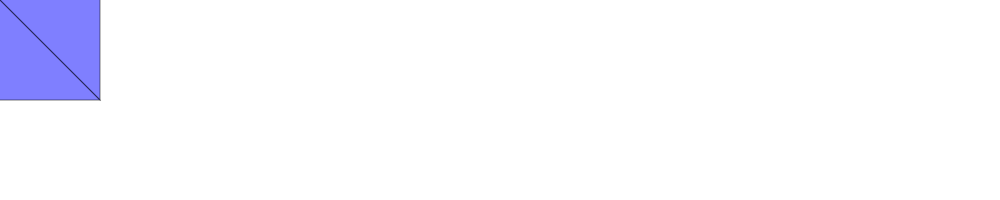

In [145]:
dessin = svgwrite.Drawing('assets/question7.svg', size=(1000,200))

aux=100
points=[(aux, aux),(-aux, aux),(-aux, -aux),(aux, -aux)]
triangles=[0,1,2,0,2,3]

i=0
dessin.add(dessin.polygon((points[triangles[3*i]],points[triangles[3*i+1]],points[triangles[3*i+2]]), fill='blue',  opacity=0.5,stroke='black'))
i=1
dessin.add(dessin.polygon((points[triangles[3*i]],points[triangles[3*i+1]],points[triangles[3*i+2]]), fill='blue',  opacity=0.5,stroke='black'))

dessin.save()
display(dessin)

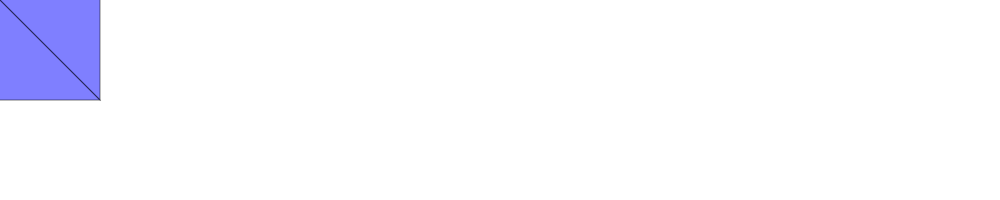

In [150]:
dessin = svgwrite.Drawing('assets/question8.svg', size=(1000,200))

aux=100
points=[(aux, aux),(-aux, aux),(-aux, -aux),(aux, -aux)]
triangles=[0,1,2,0,2,3]

new_points = points

# trans = (100, 100)
# new_points = [translater(sommet, trans) for sommet in points]

i=0
dessin.add(dessin.polygon((new_points[triangles[3*i]],new_points[triangles[3*i+1]],new_points[triangles[3*i+2]]), fill='blue',  opacity=0.5,stroke='black'))
i=1
dessin.add(dessin.polygon((new_points[triangles[3*i]],new_points[triangles[3*i+1]],new_points[triangles[3*i+2]]), fill='blue',  opacity=0.5,stroke='black'))

dessin.save()
display(dessin)